# Load Packages

In [134]:
import pandas as pd;
import numpy as np;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
import matplotlib.pyplot as plt;

# Explonational Data Analysis
## Datasets
I could to add a new column named True_type_of_transaction for the model training propose (avoid NLP including)


In [135]:
df_forward = pd.read_csv("forward_dataset1.csv")
df_forward["True_type_of_transaction"] = "forward"
df_forward.head()

,code,Type_of_Transaction,Currency,Transaction_date,Delivery_date,Price,Type_of_currency_1,True_type_of_transaction
0,89169,forward,79242,7/10/2021 13:4,13/10/2021,68851,BTC,forward
1,45059,forw,18064,14/9/2022 21:30,20/9/2021,39733,BTC,forward
2,33264,FORWARD,12140,28/10/2021 9:20,28/12/2021,53992,EURO,forward
3,341610,FORWARD,45912,27/7/2022 11:53,8/2/2021,93761,EURO,forward
4,354429,forward,96834,25/10/2021 18:5,2/12/2021,43918,BTC,forward


In [136]:
df_future = pd.read_csv("future_dataset1.csv")
df_future["True_type_of_transaction"] = "future"
df_future.head()

,code,Type_of_Transaction,Currency,Transaction_date,Delivery_date,Type_of_currency_1,True_type_of_transaction
0,89169,future,79054,6/7/2022 8:0,13/11/2021,EURO,future
1,732405,future,4174,7/2/2021 23:43,18/11/2021,BTC,future
2,23579,FUT,53230,21/3/2022 18:16,21/3/2022,EURO,future
3,547821,fut,74052,21/9/2022 8:50,5/8/2021,EURO,future
4,21513,FUT,89732,19/9/2021 15:7,5/11/2021,BTC,future


In [137]:
df_swap = pd.read_csv("swap_dataset1.csv")
df_swap["True_type_of_transaction"] = "swap"
df_swap.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction
0,120446,EURO,EURO,20150,2021-1-13 4:56,2022-11-19,2.69,swp,swap
1,89169,EURO,BTC,2069,2021-10-5 23:57,2022-8-18,1.93,SWP,swap
2,955202,EURO,EURO,28210,2021-2-25 12:44,2021-7-2,2.11,swap,swap
3,80352,EURO,EURO,25432,2022-7-3 12:11,2022-8-27,2.54,swp,swap
4,114998,EURO,EURO,99121,2021-4-28 11:29,2021-7-11,0.09,swp,swap


Concatenate all three datasets in one

In [138]:
df_concat = pd.concat([df_swap, df_forward, df_future])
df_concat.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,EURO,EURO,20150,2021-1-13 4:56,2022-11-19,2.69,swp,swap,NaN
1,89169,EURO,BTC,2069,2021-10-5 23:57,2022-8-18,1.93,SWP,swap,NaN
2,955202,EURO,EURO,28210,2021-2-25 12:44,2021-7-2,2.11,swap,swap,NaN
3,80352,EURO,EURO,25432,2022-7-3 12:11,2022-8-27,2.54,swp,swap,NaN
4,114998,EURO,EURO,99121,2021-4-28 11:29,2021-7-11,0.09,swp,swap,NaN


Let's have a look at the types of variable in this dataset

In [139]:
df_concat.dtypes

code                          int64
Type_of_currency_1           object
Type_of_currency_2           object
Currency                      int64
Transaction_date             object
Delivery_date                object
Rate                        float64
Type_of_Transaction          object
True_type_of_transaction     object
Price                       float64
dtype: object

We have 10 variablies.
4 numerical variablies and 6 categoricals.

Due to the fact the code should be unique, and the previous concatenatenation i have to check, do i have duplicate code.

In [140]:
df_code_duplicate = len(df_concat['code'])-len(df_concat['code'].drop_duplicates())
print("Numbers of code duplicate rows: {}".format(df_code_duplicate), "\n"
        "Numbers of transaction in dataset: {}".format(len(df_concat)), "\n"
        "")

Numbers of code duplicate rows: 36113 
Numbers of transaction in dataset: 299997 



I have approximately 12% of duplicate codes in dataset. That not much, I will drop that rows.

In [141]:
df_concat = df_concat.drop_duplicates(subset=['code'])

In [142]:
df_concat.shape

(263884, 10)

To have opportunity for the code to be not only number, let leave it like string variable.

Now let have a look at type_of_transaction 1 and 2 

In [143]:
df_concat['Type_of_currency_1'].value_counts()

EURO    132270
BTC     131614
Name: Type_of_currency_1, dtype: int64

The column Type_of_currency_1 contain categorical nominal variables

In [144]:
df_concat['Type_of_currency_2'].value_counts()

BTC     49441
EURO    49279
Name: Type_of_currency_2, dtype: int64

The column Type_of_currency_2 contain categorical nominal variables too. The type_of_currency 2 appears only in swap transaction.

In [145]:
df_concat['Type_of_currency_2'].isnull().sum()

165164

I have, 165164 NaN values that means it is not possible to drop NaN rows. In this case, I will replace NaN values with string "None".

In [146]:
df_concat.loc[:,"Type_of_currency_2"] = df_concat["Type_of_currency_2"].astype(str).fillna('NONE')

In [147]:
df_concat['Type_of_currency_2'].value_counts()

nan     165164
BTC      49441
EURO     49279
Name: Type_of_currency_2, dtype: int64

In [148]:
lbl = LabelEncoder()
lbl.fit(df_concat['Type_of_currency_1'])
df_concat.loc[:,'Type_of_currency_1'] = lbl.transform(df_concat['Type_of_currency_1'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_9056\467005550.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_concat.loc[:,'Type_of_currency_1'] = lbl.transform(df_concat['Type_of_currency_1'])


In [149]:
lbl.fit(df_concat['Type_of_currency_2'])
df_concat.loc[:,'Type_of_currency_2'] = lbl.transform(df_concat['Type_of_currency_2'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9056\1365538789.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_concat.loc[:,'Type_of_currency_2'] = lbl.transform(df_concat['Type_of_currency_2'])


In [150]:
df_concat['Type_of_currency_1'].value_counts()

1    132270
0    131614
Name: Type_of_currency_1, dtype: int64

In [151]:
df_concat['Type_of_currency_2'].value_counts()

2    165164
0     49441
1     49279
Name: Type_of_currency_2, dtype: int64

In [152]:
df_concat.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,1,1,20150,2021-1-13 4:56,2022-11-19,2.69,swp,swap,NaN
1,89169,1,0,2069,2021-10-5 23:57,2022-8-18,1.93,SWP,swap,NaN
2,955202,1,1,28210,2021-2-25 12:44,2021-7-2,2.11,swap,swap,NaN
3,80352,1,1,25432,2022-7-3 12:11,2022-8-27,2.54,swp,swap,NaN
4,114998,1,1,99121,2021-4-28 11:29,2021-7-11,0.09,swp,swap,NaN


In [153]:
df_concat.describe()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Rate,Price
count,2.638840e+05,263884.000000,263884.000000,263884.000000,98720.000000,86859.000000
mean,2.213522e+06,0.501243,1.438537,49966.978790,1.500079,49998.604474
std,2.940484e+06,0.499999,0.787999,28825.627432,0.867078,28975.316691
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,2.000000
25%,9.554875e+04,0.000000,1.000000,25096.750000,0.750000,24777.000000
50%,6.710505e+05,1.000000,2.000000,49961.500000,1.490000,49985.000000
75%,3.801197e+06,1.000000,2.000000,74888.250000,2.250000,75281.500000
max,9.999968e+06,1.000000,2.000000,100000.000000,3.000000,99998.000000


Due to the fact that our dataset is learning dataset, the currency, rate and price columns has normal distribution. 

For the machine learning model is good practice to normalizate the value between 0 and 1, that increase the learning speed of the model.

In [154]:
cols_continuous = ["Currency", "Rate", "Price"]

In [155]:
cs = MinMaxScaler();
df_concat[cols_continuous] = cs.fit_transform(df_concat[cols_continuous])
df_concat.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,1,1,0.201492,2021-1-13 4:56,2022-11-19,0.896667,swp,swap,NaN
1,89169,1,0,0.020680,2021-10-5 23:57,2022-8-18,0.643333,SWP,swap,NaN
2,955202,1,1,0.282093,2021-2-25 12:44,2021-7-2,0.703333,swap,swap,NaN
3,80352,1,1,0.254313,2022-7-3 12:11,2022-8-27,0.846667,swp,swap,NaN
4,114998,1,1,0.991210,2021-4-28 11:29,2021-7-11,0.030000,swp,swap,NaN


In [156]:
df_concat.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,1,1,0.201492,2021-1-13 4:56,2022-11-19,0.896667,swp,swap,NaN
1,89169,1,0,0.020680,2021-10-5 23:57,2022-8-18,0.643333,SWP,swap,NaN
2,955202,1,1,0.282093,2021-2-25 12:44,2021-7-2,0.703333,swap,swap,NaN
3,80352,1,1,0.254313,2022-7-3 12:11,2022-8-27,0.846667,swp,swap,NaN
4,114998,1,1,0.991210,2021-4-28 11:29,2021-7-11,0.030000,swp,swap,NaN


In [157]:
df_concat['Transaction_date'].isnull().sum()

0

In [158]:
df_concat['True_type_of_transaction'].isnull().sum()

0

In [159]:
df_concat['Delivery_date'].isnull().sum()

0

In [160]:
lbl.fit(df_concat['Transaction_date'])
df_concat.loc[:,'Transaction_date'] = lbl.transform(df_concat['Transaction_date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9056\4156551979.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_concat.loc[:,'Transaction_date'] = lbl.transform(df_concat['Transaction_date'])


In [161]:
lbl.fit(df_concat['Delivery_date'])
df_concat.loc[:,'Delivery_date'] = lbl.transform(df_concat['Delivery_date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9056\79088673.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_concat.loc[:,'Delivery_date'] = lbl.transform(df_concat['Delivery_date'])


In [162]:
lbl.fit(df_concat['True_type_of_transaction'])
df_concat.loc[:,'True_type_of_transaction'] = lbl.transform(df_concat['True_type_of_transaction'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9056\4217628056.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_concat.loc[:,'True_type_of_transaction'] = lbl.transform(df_concat['True_type_of_transaction'])


In [163]:
df_concat.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,1,1,0.201492,71208,714,0.896667,swp,2,NaN
1,89169,1,0,0.020680,77706,937,0.643333,SWP,2,NaN
2,955202,1,1,0.282093,88424,575,0.703333,swap,2,NaN
3,80352,1,1,0.254313,155500,947,0.846667,swp,2,NaN
4,114998,1,1,0.991210,96698,566,0.030000,swp,2,NaN


In [164]:

lbl.fit(df_concat['Price'])
df_concat.loc[:,'Price'] = lbl.transform(df_concat['Price'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9056\1900163243.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_concat.loc[:,'Price'] = lbl.transform(df_concat['Price'])


In [165]:
df_concat

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,1,1,0.201492,71208,714,0.896667,swp,2,58105
1,89169,1,0,0.020680,77706,937,0.643333,SWP,2,58105
2,955202,1,1,0.282093,88424,575,0.703333,swap,2,58105
3,80352,1,1,0.254313,155500,947,0.846667,swp,2,58105
4,114998,1,1,0.991210,96698,566,0.030000,swp,2,58105
...,...,...,...,...,...,...,...,...,...,...
99991,7321545,1,2,0.019710,16438,266,NaN,FUTURE,1,58105
99992,12210,0,2,0.978010,230501,145,NaN,FUT,1,58105
99994,780677,1,2,0.582086,210068,106,NaN,FUTURE,1,58105
99997,4393683,0,2,0.473025,26208,82,NaN,FUT,1,58105


In [166]:
df_concat.head()

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Type_of_Transaction,True_type_of_transaction,Price
0,120446,1,1,0.201492,71208,714,0.896667,swp,2,58105
1,89169,1,0,0.020680,77706,937,0.643333,SWP,2,58105
2,955202,1,1,0.282093,88424,575,0.703333,swap,2,58105
3,80352,1,1,0.254313,155500,947,0.846667,swp,2,58105
4,114998,1,1,0.991210,96698,566,0.030000,swp,2,58105


In [167]:
df_concat.dtypes

code                          int64
Type_of_currency_1            int32
Type_of_currency_2            int32
Currency                    float64
Transaction_date              int32
Delivery_date                 int32
Rate                        float64
Type_of_Transaction          object
True_type_of_transaction      int32
Price                         int64
dtype: object

In [168]:
df_concat = df_concat.drop("Type_of_Transaction", axis=1)
df_concat

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,True_type_of_transaction,Price
0,120446,1,1,0.201492,71208,714,0.896667,2,58105
1,89169,1,0,0.020680,77706,937,0.643333,2,58105
2,955202,1,1,0.282093,88424,575,0.703333,2,58105
3,80352,1,1,0.254313,155500,947,0.846667,2,58105
4,114998,1,1,0.991210,96698,566,0.030000,2,58105
...,...,...,...,...,...,...,...,...,...
99991,7321545,1,2,0.019710,16438,266,NaN,1,58105
99992,12210,0,2,0.978010,230501,145,NaN,1,58105
99994,780677,1,2,0.582086,210068,106,NaN,1,58105
99997,4393683,0,2,0.473025,26208,82,NaN,1,58105


In [169]:

df_concat['Rate'] = df_concat['Rate'].fillna("0")

In [170]:
df_concat

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,True_type_of_transaction,Price
0,120446,1,1,0.201492,71208,714,0.896667,2,58105
1,89169,1,0,0.020680,77706,937,0.643333,2,58105
2,955202,1,1,0.282093,88424,575,0.703333,2,58105
3,80352,1,1,0.254313,155500,947,0.846667,2,58105
4,114998,1,1,0.991210,96698,566,0.03,2,58105
...,...,...,...,...,...,...,...,...,...
99991,7321545,1,2,0.019710,16438,266,0,1,58105
99992,12210,0,2,0.978010,230501,145,0,1,58105
99994,780677,1,2,0.582086,210068,106,0,1,58105
99997,4393683,0,2,0.473025,26208,82,0,1,58105


In [171]:
df_concat = df_concat.astype('float32')

In [172]:
import tensorflow as tf;
from keras import optimizers;
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization

In [173]:
y = df_concat['True_type_of_transaction']
X = df_concat.drop('True_type_of_transaction', axis = 1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [175]:
X_train

,code,Type_of_currency_1,Type_of_currency_2,Currency,Transaction_date,Delivery_date,Rate,Price
18528,189088.0,0.0,0.0,0.503155,83083.0,403.0,0.423333,58105.0
44090,828846.0,1.0,2.0,0.766008,178667.0,243.0,0.000000,47963.0
10381,204394.0,1.0,1.0,0.852709,151831.0,329.0,0.123333,58105.0
95807,94075.0,0.0,0.0,0.317813,96846.0,539.0,0.220000,58105.0
62604,79492.0,1.0,0.0,0.563516,80756.0,818.0,0.370000,58105.0
...,...,...,...,...,...,...,...,...
93907,8585787.0,0.0,2.0,0.334673,16752.0,1209.0,0.000000,35237.0
31161,622720.0,1.0,2.0,0.521815,24624.0,157.0,0.000000,58105.0
67614,20331.0,0.0,0.0,0.938399,139994.0,808.0,0.953333,58105.0
22209,426631.0,1.0,2.0,0.255043,19822.0,1111.0,0.000000,45675.0


In [176]:
y_train

18528    2.0
44090    0.0
10381    2.0
95807    2.0
62604    2.0
        ... 
93907    0.0
31161    1.0
67614    2.0
22209    0.0
59695    0.0
Name: True_type_of_transaction, Length: 176802, dtype: float32

In [177]:
# determine the number of input features
n_features = X_train.shape[1]


In [178]:
n_features

8

In [179]:
# Model defining
model = Sequential()
model.add(Dense(8, input_shape=(n_features,)))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(X_train, y_train, epochs=25, verbose=1, validation_split = 0.3)

Epoch 1/25
3868/3868 [==============================] - 8s 2ms/step - loss: 4006.2996 - accuracy: 0.5940 - val_loss: 1591.7872 - val_accuracy: 0.6656
Epoch 2/25
3868/3868 [==============================] - 7s 2ms/step - loss: 1334.0093 - accuracy: 0.6870 - val_loss: 771.6248 - val_accuracy: 0.7377
Epoch 3/25
3868/3868 [==============================] - 7s 2ms/step - loss: 1184.4207 - accuracy: 0.7099 - val_loss: 3260.7773 - val_accuracy: 0.7013
Epoch 4/25
3868/3868 [==============================] - 7s 2ms/step - loss: 914.0366 - accuracy: 0.7314 - val_loss: 522.9003 - val_accuracy: 0.7646
Epoch 5/25
3868/3868 [==============================] - 7s 2ms/step - loss: 906.6282 - accuracy: 0.7354 - val_loss: 1515.6962 - val_accuracy: 0.7276
Epoch 6/25
3868/3868 [==============================] - 7s 2ms/step - loss: 790.3294 - accuracy: 0.7522 - val_loss: 297.4802 - val_accuracy: 0.8048
Epoch 7/25
3868/3868 [==============================] - 7s 2ms/step - loss: 789.8384 - accuracy: 0.7591 - 

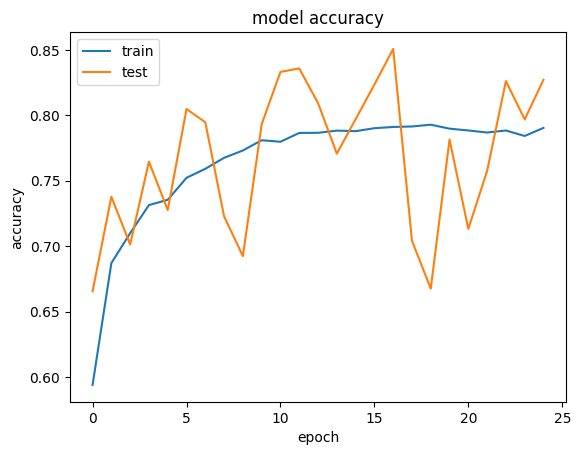

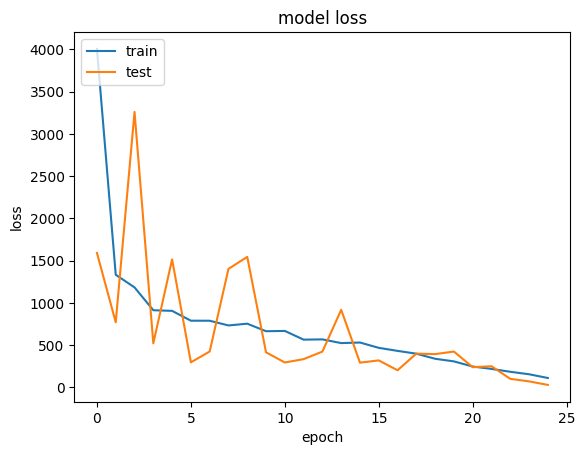

In [180]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [181]:
# Model defining
model = Sequential()
model.add(Dense(8, kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dense(6, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dense(3))
model.add(Activation('softmax'))


In [182]:
# compile the modelD
opt = optimizers.SGD(learning_rate=0.001)

In [183]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [184]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split = 0.3)

Epoch 1/100
3868/3868 [==============================] - 9s 2ms/step - loss: 0.9310 - accuracy: 0.5465 - val_loss: 0.9232 - val_accuracy: 0.5786
Epoch 2/100
3868/3868 [==============================] - 8s 2ms/step - loss: 0.7822 - accuracy: 0.6327 - val_loss: 0.8981 - val_accuracy: 0.5872
Epoch 3/100
3868/3868 [==============================] - 8s 2ms/step - loss: 0.7051 - accuracy: 0.6846 - val_loss: 0.7082 - val_accuracy: 0.7404
Epoch 4/100
3868/3868 [==============================] - 9s 2ms/step - loss: 0.6576 - accuracy: 0.7212 - val_loss: 1.7674 - val_accuracy: 0.4653
Epoch 5/100
3868/3868 [==============================] - 9s 2ms/step - loss: 0.6141 - accuracy: 0.7433 - val_loss: 0.7234 - val_accuracy: 0.7125
Epoch 6/100
3868/3868 [==============================] - 9s 2ms/step - loss: 0.5746 - accuracy: 0.7645 - val_loss: 0.9759 - val_accuracy: 0.5143
Epoch 7/100
3868/3868 [==============================] - 9s 2ms/step - loss: 0.5246 - accuracy: 0.7996 - val_loss: 1.4864 - val_ac

In [185]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.159434512257576
Test Accuracy: 0.9460049271583557


In [215]:
st0 = np.random.get_state()

In [216]:
# make a prediction
y_pred = model.predict(X_test)
y_pred

2722/2722 [==============================] - 3s 1ms/step


array([[5.16444892e-02, 9.47210371e-01, 1.14511012e-03],
       [9.99956489e-01, 4.35039692e-05, 2.46583092e-08],
       [1.16068814e-02, 1.07213929e-01, 8.81179154e-01],
       ...,
       [4.78675924e-02, 9.43424940e-01, 8.70748144e-03],
       [9.99992132e-01, 7.92270839e-06, 4.26344116e-08],
       [8.11855588e-03, 1.02069795e-01, 8.89811575e-01]], dtype=float32)

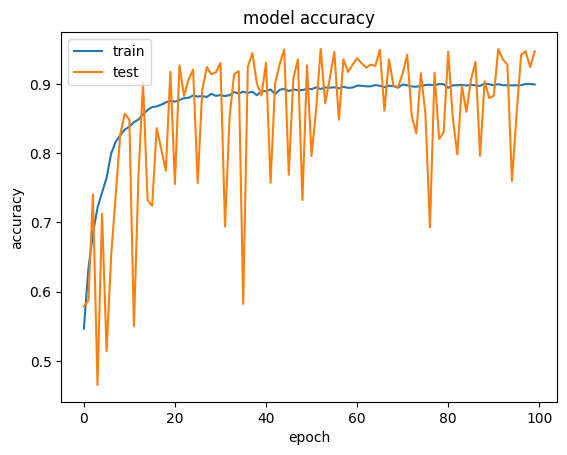

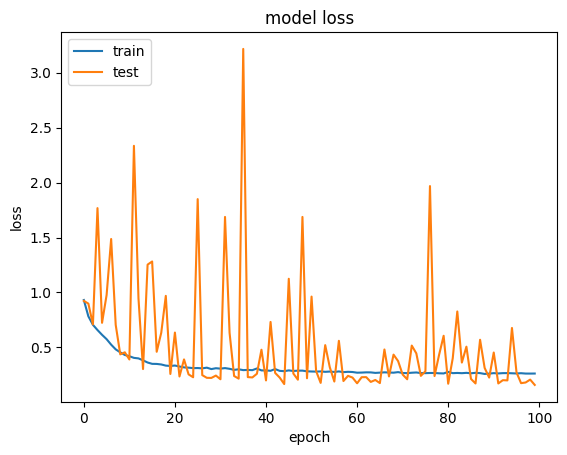

In [217]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [188]:
from sklearn import metrics

In [189]:
y_pred = y_pred.round()

In [190]:
y_test = y_test.round()

In [191]:
y_pred = np.argmax(y_pred, axis=-1, keepdims=True)

In [192]:
y_pred

array([[1],
       [0],
       [2],
       ...,
       [1],
       [0],
       [2]], dtype=int64)

In [193]:
confusion = print(metrics.confusion_matrix(y_test, y_pred));

[[26059  2608    81]
 [  329 24379  1171]
 [  123   449 31883]]


In [194]:
def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)

In [195]:
accuracy(y_test, y_pred)

0.9453273925725179

In [196]:
#Computation of macro-averaged precision

def macro_precision(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in list(y_true.unique()):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)
        
        
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        # keep adding precision for all classes
        precision += temp_precision
        
    # calculate and return average precision over all classes
    precision /= num_classes
    
    return precision


In [197]:
# Functions to compute True Positives, True Negatives, False Positives and False Negatives

def true_positive(y_true, y_pred):
    
    tp = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 1 and yp == 1:
            tp += 1
    
    return tp

def true_negative(y_true, y_pred):
    
    tn = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 0 and yp == 0:
            tn += 1
            
    return tn

def false_positive(y_true, y_pred):
    
    fp = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 0 and yp == 1:
            fp += 1
            
    return fp

def false_negative(y_true, y_pred):
    
    fn = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 1 and yp == 0:
            fn += 1
            
    return fn

In [198]:
print(f"Macro-averaged Precision score : {macro_precision(y_test, y_pred) }")

Macro-averaged Precision score : 0.9445809018870754


In [199]:
def micro_precision(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in y_true.unique():
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [200]:
print(f"Micro-averaged Precision score : {micro_precision(y_test, y_pred)}")

Micro-averaged Precision score : 0.9453273925725179


In [201]:
#Computation of macro-averaged recall

def macro_recall(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize recall to 0
    recall = 0
    
    # loop over all classes
    for class_ in list(y_true.unique()):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false negative for current class
        fn = false_negative(temp_true, temp_pred)
        
        
        # compute recall for current class
        temp_recall = tp / (tp + fn + 1e-6)
        
        # keep adding recall for all classes
        recall += temp_recall
        
    # calculate and return average recall over all classes
    recall /= num_classes
    
    return recall

In [202]:
print(f"Macro-averaged recall score : {macro_recall(y_test, y_pred)}")

Macro-averaged recall score : 0.9436255336689134


In [203]:
def micro_recall(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fn = 0
    
    # loop over all classes
    for class_ in y_true.unique():
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false negative for current class
        # and update overall tp
        fn += false_negative(temp_true, temp_pred)
        
    # calculate and return overall recall
    recall = tp / (tp + fn)
    return recall

In [204]:
print(f"Micro-averaged recall score : {micro_recall(y_test, y_pred)}")

Micro-averaged recall score : 0.9453273925725179


In [205]:
#Computation of macro-averaged fi score

def macro_f1(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize f1 to 0
    f1 = 0
    
    # loop over all classes
    for class_ in list(y_true.unique()):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false negative for current class
        fn = false_negative(temp_true, temp_pred)
        
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)
        
        
        # compute recall for current class
        temp_recall = tp / (tp + fn + 1e-6)
        
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        
        
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        
        # keep adding f1 score for all classes
        f1 += temp_f1
        
    # calculate and return average f1 score over all classes
    f1 /= num_classes
    
    return f1

In [206]:
print(f"Macro-averaged f1 score : {macro_f1(y_test, y_pred)}")

Macro-averaged f1 score : 0.9432916110242021


In [207]:
def micro_f1(y_true, y_pred):


    #micro-averaged precision score
    P = micro_precision(y_true, y_pred)

    #micro-averaged recall score
    R = micro_recall(y_true, y_pred)

    #micro averaged f1 score
    f1 = 2*P*R / (P + R)    

    return f1

In [208]:
print(f"Micro-averaged recall score : {micro_f1(y_test, y_pred)}")

Micro-averaged recall score : 0.9453273925725179


In [209]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [210]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{0.0: 0.9493572877126131, 1.0: 0.9460447069450455, 2.0: 0.9797282638278707}

In [211]:
import seaborn as sns

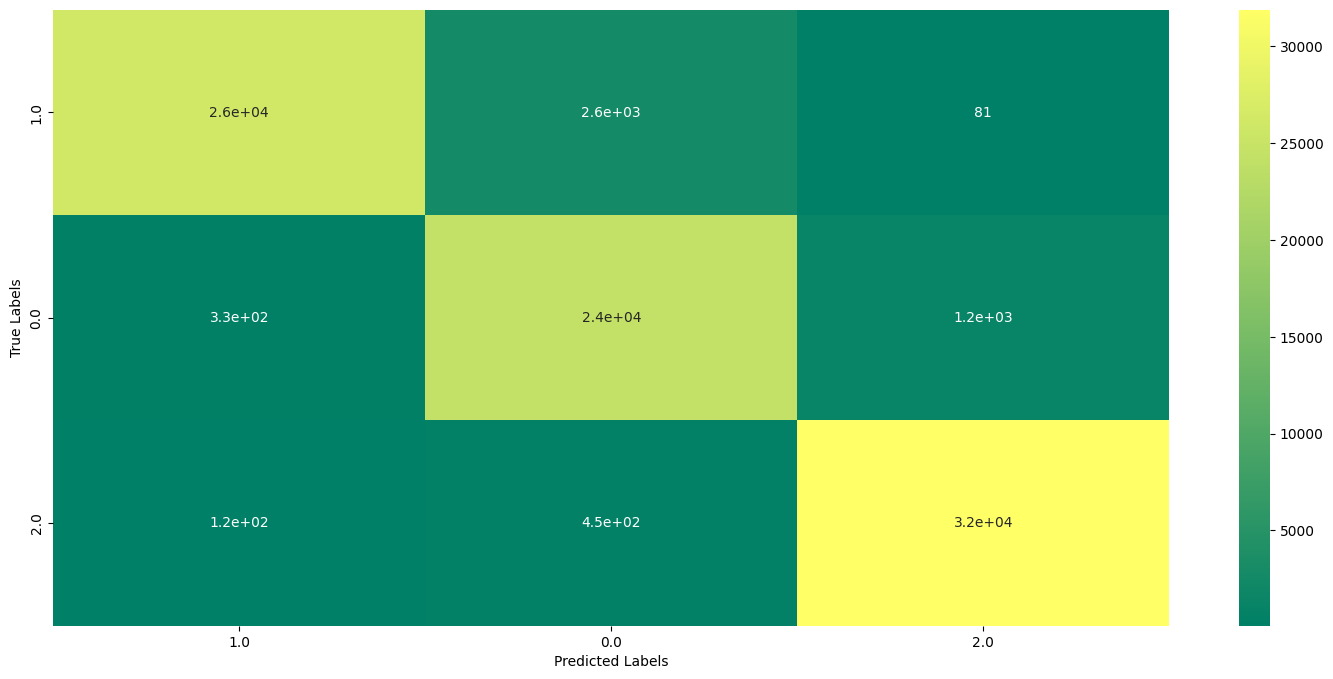

In [212]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [213]:
y_test.unique()

array([1., 0., 2.], dtype=float32)

In [214]:
metrics.confusion_matrix(y_test, y_pred)

array([[26059,  2608,    81],
       [  329, 24379,  1171],
       [  123,   449, 31883]], dtype=int64)